# Планирование реламной кампании для интернет-магазина

**Цель проекта** - изучение данных о продажах компьютерных игр в предыдущие годы для выявления параметров, определяющих успешность той или иной игры. На основе исследования заказчик сможет спланировать результативную рекламную кампанию.

Массив данных содержит в себе информацию о компьютерных играх, продаваемых в интернет-магазине: название, платформу, год выпуска, жанр, данные о продажах в разных регионах, оценки критиков и пользователей, а также рейтинг. 

В ходе исследования решается ряд **задач**:
- заполнение пропусков в столбцах, где это возможно; 
- изменение типов данных в столбцах;
- добавление дополнительных столбцов, упрощающих исследование;
- проведение анализа продаж компьютерных игр:
    + динамики количества выпускаемых игр;
    + объема продаж в разрезе платформ;
    + прибыльности платформ;
    + взаимосвязи продаж с отзывами экспертов и пользователей;
    + взаимосвязи продаж с игровыми жанрами;
- анализ пользователей из разных регионов;
- проверка статистических гипотез.

## Содержание

Обзор данных

Подготовка данных

Анализ продаж компьютерных игр

- Динамика количества выпускаемых игр
- Объем продаж в разрезе платформ
- Выбор актуального периода для прогнозирования
- Анализ прибыльности платформ
- Взаимосвязь отзывов и объема продаж
- Взаимосвязь игровых жанров и объема продаж
    
Анализ пользователей из разных регионов

Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC
- Средние пользовательские рейтинги жанров Action и Sports

Общий вывод исследования

### Шаг 1. Изучение общей информации <a name="review"></a>

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import re
import warnings
warnings.filterwarnings('ignore')

Считывание файла с данными в датафрейм:

In [2]:
games = pd.read_csv('/datasets/games.csv')

Получение данных о первых 10 строках таблицы **games**:

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о данных таблицы:

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим полученную информацию.

В таблице **11** столбцов:

- **Name** — название игры /строковый тип данных
- **Platform** — платформа / строковый тип данных
- **Year_of_Release** — год выпуска / числа с плав.точкой
- **Genre** — жанр игры / строковый тип данных 
- **NA_sales** — продажи в Северной Америке (млн проданных копий) / числа с плав.точкой
- **EU_sales** — продажи в Европе (млн проданных копий) / числа с плав.точкой
- **JP_sales** — продажи в Японии (млн проданных копий) / числа с плав.точкой
- **Other_sales** — продажи в других странах (млн проданных копий) / числа с плав.точкой
- **Critic_Score** — оценка критиков (макс. 100) / числа с плав.точкой
- **User_Score** — оценка пользователей (макс. 10) / строковый тип данных
- **Rating** — рейтинг от организации ESRB / строковый тип данных

и **16715** строк, каждая из которых сожержит информацию об одной игре.

### Вывод

Каждая строка таблицы содержит сведения о компьютерной игре, продаваемой в интернет-магазине: название, платформу, год выпуска, жанр, данные о продажах в разных регионах, оценки критиков, пользователей, а также рейтинг.

Задачи, которые нужно решить, прежде чем приступить к поиску ответов на поставленные вопросы:

- приведение названий столбцов к нижнему регистру;
- обработка пропусков данных в столбцах;
- изменение типов данных в столбцах;
- добавление в таблицу новых столбцов с более наглядными для сравнения характеристиками (суммарные продажи во всех регионах).

### Шаг 2. Подготовка данных <a name="preparation"></a>

**Предобработка информации**

В первую очередь приведем названия столбцов к нижнему регистру:

In [5]:
games.columns = games.columns.str.lower()

In [6]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь рассмотрим поочередно все столбцы таблицы. Будем заполнять пропуски, а также менять тип данных там, где это необходимо.

**1. name — название игры:**

In [7]:
games['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

Во-первых, в столбце проущено две строки. Во-вторых, есть повторы: уникальных значений всего 11 559.

Выясним, что содержится в строках, где пропущено название игры:

In [8]:
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Большинство информации пропущено, а продажи указанных игр оказались невелики. Без существенного искажения данных строки можно удалить:

In [9]:
games.dropna(subset = ['name'], inplace = True)

In [10]:
games['name'].isna().sum()

0

Теперь рассмотрим строки, в которых повторяются названия игр, на примере самого часто встречаемого - Need for Speed: Most Wanted:

In [11]:
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Одинаковые названия не означают того, что строки полностью дублируются: одна и та же игра могла выходить на разных консолях и в разные годы. Так как в данных нет столбца с уникальным кодом игры, будем считать, что однозначно ее определяет совокупность четырех параметров: имя, платформа, год выхода и жанр. Проверим таблицу на дубликаты: 

In [12]:
dupl_rows = games[games.duplicated(['name', 'platform', 'year_of_release', 'genre'])]

In [13]:
dupl_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Рассмотрим подробнее:

In [14]:
games.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Действительно, повторяются строки со спортивной игрой Madden NFL 13, вышедшей в 2012 г. на платформе PS3. При этом также совпадают рейтинги, а продажи в строке №16230 практически отсутствуют. Удалим ее:

In [15]:
del_ = games[(games['name'] == 'Madden NFL 13') & (games['na_sales'] == 0)]

In [16]:
games = games.drop(del_.index, axis=0)

In [17]:
games.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


Таким образом, из таблицы удалено три строки: две с пропущенным названием игр и один дубликат. Остальные данные корректны.

**2. platform — платформа:**

In [18]:
games['platform'].describe()

count     16712
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

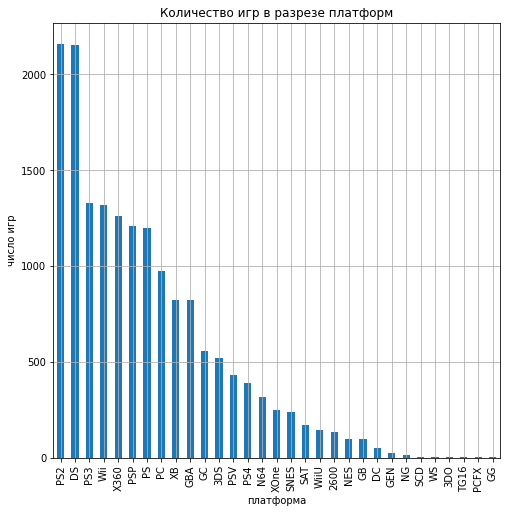

In [19]:
games.pivot_table(index = 'platform', values = 'name', aggfunc = 'count')\
                            .reset_index().sort_values(by = 'name', ascending = False)\
                            .plot(x = 'platform', y = 'name', grid = True, figsize = (8,8),\
                             title = 'Количество игр в разрезе платформ', kind = 'bar', legend = False)
plt.xlabel('платформа')
plt.ylabel('число игр')
plt.show()

Среди названий платформ необычных значений нет.

In [20]:
games['platform'].isna().sum()

0

Пропусков также нет. Данные корректны.

**3. year_of_release — год выпуска:**

In [21]:
games['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Сразу обращает на себя внимание некорркетный тип данных. Заменим его на более подходящий позже. 

Самый ранний год выпуска игры - 1980, самый поздний - 2016, что соответствует ожиданиям.

In [22]:
games['year_of_release'].isna().sum()

269

В столбце пропущено 269 значений. Рассмотрим строки с пропусками подробнее:

In [23]:
games.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Обратим внимание на то, что в названиях некоторых игр встречается год. С большой вероятностью можно полагать, что это именно год выпуска. Найдем все даты в названиях игр и запишем в новый столбец:

In [24]:
games['year_from_name'] = games['name'].str.extract(r'(\d{4})')

In [25]:
games.query('year_of_release.isna() and ~year_from_name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_from_name
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2003
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2009
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2002
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2003
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2003
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,2005


Получили 17 строк, в которых год релиза был пропущен в соответствующем столбце, но указан в названии игры. Все значения дат находятся в нужном промежутке, поэтому внесем их в основной столбец, а вспомогательный удалим.

In [26]:
games.loc[games['year_of_release'].isna(), 'year_of_release'] = games['year_from_name']

In [27]:
del games['year_from_name']

In [28]:
games['year_of_release'].isna().sum()

252

Осталось 252 пропуска (1,5% всех строк таблицы). Это не так много, можно удалить указанные строки. Они будут бесполезны для дальнейшего анализа и с той точки зрения, что дальнейший выбор актуального периода как раз опирается на рассматриваемый показатель.

In [29]:
del_ = games[(games['year_of_release'].isna())]

In [30]:
games = games.drop(del_.index, axis=0)

Наконец, приведем данные к целочисленному типу (тип datetime здесь не нужен - не указаны ни дата, ни время):

In [31]:
games['year_of_release'] = games['year_of_release'].astype(int)

**4. genre — жанр игры:**

In [32]:
games['genre'].describe()

count      16460
unique        12
top       Action
freq        3308
Name: genre, dtype: object

In [33]:
games['genre'].value_counts()

Action          3308
Sports          2317
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1229
Platform         878
Simulation       857
Fighting         838
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Пропусков в столбце нет. Синонимичных жанров, которые можно было бы объединить, и других ошибок в данных тоже нет.

**5. na_sales — продажи в Северной Америке (млн копий):**

Далее для анализа 4 столбцов будут совершаться однотипные действия. Для упрощения составим функцию **desribe_col**, принимающую в качестве аргумента имя столбца и выводящую основные статистики распределения, количество нулевых значений, а также игр из ТОП-10 продаж.

In [34]:
def desribe_col(col):
    df = games
    print('Статистики:')
    display(df[col].describe())
    print()
    print('Нулевые продажи:')
    display(df.loc[df[col] == 0][col].count())
    print()
    print('Топ-10 продаж:')    
    display(df.loc[0:9, ['name', 'platform', 'year_of_release', col]].sort_values(by = col, ascending = False))  

In [35]:
desribe_col('na_sales')

Статистики:


count    16460.000000
mean         0.264283
std          0.818662
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64


Нулевые продажи:


4451


Топ-10 продаж:


,name,platform,year_of_release,na_sales
0,Wii Sports,Wii,2006,41.36
1,Super Mario Bros.,NES,1985,29.08
9,Duck Hunt,NES,1984,26.93
5,Tetris,GB,1989,23.20
2,Mario Kart Wii,Wii,2008,15.68
3,Wii Sports Resort,Wii,2009,15.61
8,New Super Mario Bros. Wii,Wii,2009,14.44
7,Wii Play,Wii,2006,13.96
6,New Super Mario Bros.,DS,2006,11.28
4,Pokemon Red/Pokemon Blue,GB,1996,11.27


Среднее значение по столбцу **na_sales** - 0,26 млн проданных копий, медиана - всего 0,08 млн. При этом минимальное значение равно 0, максимальное - 41,36, что существенно превышает среднее.

4451 игра не продавалась в Северной Америке вообще (вероятно, версии, локализованные под конкретный регион, отличающийся от рассматриваемого).

Среди самых продаваемых в Северной Америке игр - всемирно известные Wii, Super Mario, Pokemon, Tetris. Для них действительно может иметь место столь высокий уровень продаж.

Большое количество аномальных значений - нулевые продажи в 27% случаев и огромные тиражи нескольких хитов - объясняют существенный разрыв между медианным и средним значениями. Тем не менее, пропусков нет, данные корректны.

**7. eu_sales — продажи в Европе (млн копий):**

In [36]:
desribe_col('eu_sales')

Статистики:


count    16460.000000
mean         0.146101
std          0.506827
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64


Нулевые продажи:


5769


Топ-10 продаж:


,name,platform,year_of_release,eu_sales
0,Wii Sports,Wii,2006,28.96
2,Mario Kart Wii,Wii,2008,12.76
3,Wii Sports Resort,Wii,2009,10.93
7,Wii Play,Wii,2006,9.18
6,New Super Mario Bros.,DS,2006,9.14
4,Pokemon Red/Pokemon Blue,GB,1996,8.89
8,New Super Mario Bros. Wii,Wii,2009,6.94
1,Super Mario Bros.,NES,1985,3.58
5,Tetris,GB,1989,2.26
9,Duck Hunt,NES,1984,0.63


Распределение ведет себя похожим образом с предыдущим. Среднее значение - 0,15 млн проданных копий, медиана - 0,02 млн. Минимальное значение - 0, максимальное - 28,96.

5769 игр не продавалось в Европе. В лидерах по продажам также самые популярные игры.

Вывод аналогичен предыдущему: нулевые продажи в 35% случаев и десятки миллионов бестселлеров приводят к большой разнице между медианным и средним значениями. Пропусков в столбце нет, данные корректны.

**7. jp_sales — продажи в Японии (млн копий):**

In [37]:
desribe_col('jp_sales')

Статистики:


count    16460.000000
mean         0.078432
std          0.310960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64


Нулевые продажи:


10312


Топ-10 продаж:


,name,platform,year_of_release,jp_sales
4,Pokemon Red/Pokemon Blue,GB,1996,10.22
1,Super Mario Bros.,NES,1985,6.81
6,New Super Mario Bros.,DS,2006,6.50
8,New Super Mario Bros. Wii,Wii,2009,4.70
5,Tetris,GB,1989,4.22
2,Mario Kart Wii,Wii,2008,3.79
0,Wii Sports,Wii,2006,3.77
3,Wii Sports Resort,Wii,2009,3.28
7,Wii Play,Wii,2006,2.93
9,Duck Hunt,NES,1984,0.28


Такое же поведение распределения, только еще больше игр с нулевыми продажами. Среднее значение - 0,07 млн проданных копий, медиана - 0 млн. Минимальное значение - 0, максимальное - 10,22.

Всего 37,4% от общего списка игр (6148 шт.) продавалось в Японии.

Поскольку численность населения в Японии существенно ниже, чем в Северной Америке или Европе, то и самые успешные игры там собрали меньшее число продаж.

Пропусков в столбце нет, данные корректны.

**8. other_sales — продажи в других странах (млн проданных копий):**

In [38]:
desribe_col('other_sales')

Статистики:


count    16460.000000
mean         0.047679
std          0.188047
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


Нулевые продажи:


6495


Топ-10 продаж:


,name,platform,year_of_release,other_sales
0,Wii Sports,Wii,2006,8.45
2,Mario Kart Wii,Wii,2008,3.29
3,Wii Sports Resort,Wii,2009,2.95
6,New Super Mario Bros.,DS,2006,2.88
7,Wii Play,Wii,2006,2.84
8,New Super Mario Bros. Wii,Wii,2009,2.24
4,Pokemon Red/Pokemon Blue,GB,1996,1.00
1,Super Mario Bros.,NES,1985,0.77
5,Tetris,GB,1989,0.58
9,Duck Hunt,NES,1984,0.47


Среднее значение - 0,05 млн проданных копий, медиана - 0,01 млн. Минимальное значение - 0, максимальное - 10,57 (статистики сравнимы с соответствующими показателями Японии).

6495 игр (39,4%) не продавались на рынках всех прочих стран.

Пропусков в столбце нет, данные корректны.

**9. critic_score — оценка критиков:**

In [39]:
games['critic_score'].describe()

count    7994.000000
mean       69.001376
std        13.925213
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Оценки критиков присутствуют всего в 7994 строках (48,5%): далеко не на каждую из выпускаемых игр делается обзор специалистов. Удаление половины строк из массива может существенно исказить данные и выводы. Одним из вариантов решения проблемы могло бы стать заполнение пропусков средним значением, рассчитанным по какой-то из категорий (например, по жанру или по платформе). Однако все равно для этого отсутствует слишком большое количество информации: половина всех значений после замены станет средним, и анализ будет бессмысленным. 

Более того, в дальнейшем исследовании указанный столбец понадобится лишь однажды - для оценки продаж внутри популярной платформы в зависимости от отзывов критиков. Наконец, на следующем шаге предстоит сделать срез таблицы, выбрав актуальный временной период. Предположительно, с годами возможность консолидировать оценки критиков улучшилась (обмен информацией стал более простым и доступным), и есть шанс, что заполняемость данных по срезу будет выше. Поэтому оставим столбец в исходном виде.

**10. user_score — оценка пользователей:**

In [40]:
games['user_score'].describe()

count     9850
unique      96
top        tbd
freq      2378
Name: user_score, dtype: object

In [41]:
games['user_score'].value_counts()

tbd    2378
7.8     322
8       285
8.2     277
8.3     252
       ... 
1.1       2
1.9       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Данные в столбце имеют строковый тип из-за аббревиатуры tbd; таких строк 2378. Указанное сокращение (от англ. *to be defined - подлежит уточнению*) не дает возможности определить реальную оценку пользователя, поэтому логично заменить все такие значения на NaN, после чего поменять тип на вещественный.

In [42]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = None

In [43]:
games['user_score'] = games['user_score'].astype(float)

In [44]:
games['user_score'].describe()

count    7472.000000
mean        7.128011
std         1.499178
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

По причинам, описанным в предыдущем пункте, оставим пропуски в рассматриваемом столбце незаполненными.

**11. rating — рейтинг от организации ESRB:**

In [45]:
games['rating'].describe()

count     9778
unique       8
top          E
freq      3929
Name: rating, dtype: object

In [46]:
games['rating'].value_counts()

E       3929
T       2905
M       1537
E10+    1394
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Набор принимаемых значений соответствует реальным категориям рейтинга ESRB. 

Заполнено всего 9778 строк (59,4%), при этом невозможно предсказать возможное значение, основываясь на других данных из таблицы. Даже для игры с одним и тем же названием рейтинг может различаться. Например:

In [47]:
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Оставим пропуски без изменений.

**Суммарные продажи** 

Добавим в таблицу столбец, показывающий суммарные продажи игры во всех регионах:

In [48]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [49]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод**

В 5 столбцах таблицы были пропущены данные об играх. Часть пропусков заполнена значениями, подходящими логически (**year_of_release**, **user_score**), часть оставлена без изменений (**critic_score**, **user_score**, **rating**). Часть строк из-за пропусков удалена (1,5% от общего количества). 

Изменен тип данных (**year_of_release**, **user_score**).

Аномальных значений не выявлено.

Добавлен столбец **total_sales**, отвечающий за суммарные продажи иры по всем регионам.

Данные готовы к анализу.

### Шаг 3. Анализ продаж компьютерных игр <a name="analysis"></a>

В разделе будет рассмотрено, как влияют на объем продаж различные факторы - модель платформы, жанр, отзывы критиков и пользователей.

#### 1. Динамика количества выпускаемых игр <a name="game_time"></a>

Проверим, сколько игр выпускалось в разные годы.

In [50]:
pivot_games_in_year = games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()

In [51]:
pivot_games_in_year.columns = ['year_of_release', 'num_of_games']

In [52]:
pivot_games_in_year.head()

,year_of_release,num_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


In [53]:
pivot_games_in_year['num_of_games'].min()

9

In [54]:
pivot_games_in_year['num_of_games'].max()

1429

Посмотрим на график зависимости числа игр от времени:

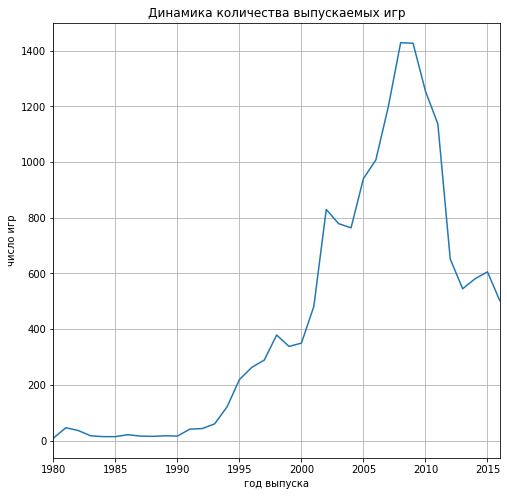

In [55]:
pivot_games_in_year.plot(x = 'year_of_release', y = 'num_of_games', xlim = (1980, 2016), grid = True, figsize = (8,8),\
                         title = 'Динамика количества выпускаемых игр', legend = False)
plt.xlabel('год выпуска')
plt.ylabel('число игр')
plt.show()

До 1993 года количество выпускаемых игр оставалось примено на одном и том же невысоком уровне - около 20 штук. С 1993 по 2000 началось довольно быстрое увеличение - с 60 до 350 игр в год. В промежутке с 2000 г. по 2008 г. рост был стремительным (с 350 до 1429 игр), после чего показатель резко упал до 502 игр к 2016 г.

Прежде чем выбирать актуальный период, рассмотрим еще одну характеристику - объем продаж в зависимости от платформы.

#### 2. Объем продаж в разрезе платформ <a name="sales_platform"></a>

Определим суммарные продажи по каждой из платформ:

In [56]:
pivot_sales_per_platform = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
                            .reset_index().sort_values(by = 'total_sales', ascending = False)

In [57]:
pivot_sales_per_platform.head(10)

,platform,total_sales
16,PS2,1247.28
28,X360,961.30
17,PS3,931.33
26,Wii,891.18
4,DS,802.79
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,290.34
2,3DS,257.81


Посмотрим на графике:

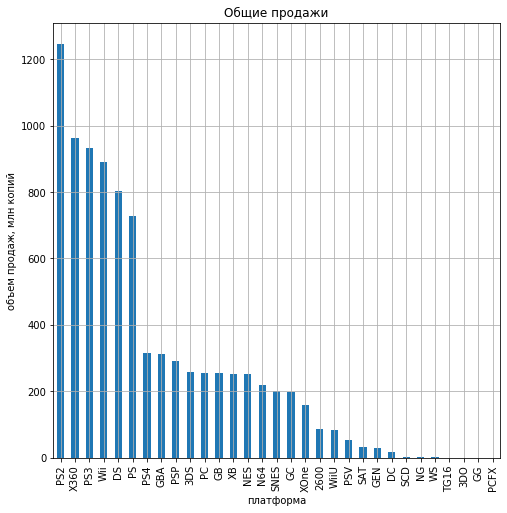

In [58]:
pivot_sales_per_platform.plot(x = 'platform', y = 'total_sales', grid = True, figsize = (8,8),\
                         title = 'Общие продажи', kind = 'bar', legend = False)
plt.xlabel('платформа')
plt.ylabel('объем продаж, млн копий')
plt.show()

Среди всех платформ явно выделяются 6 лидеров: PS2 (1247.28 млн), X360 (961.30 млн), PS3 (931.33 млн), Wii (891.18), DS (802.79) и PS (727.58). Построим для каждой из указаных консолей распределение продаж по годам. Для этого зададим функцию, принимающую на вход название датафрейма и платформы.

In [59]:
def plot_sales_per_platform(df, pl):
    df.loc[df['platform'] == pl]\
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')\
        .plot(grid = True, figsize = (5,5), title = 'Общие продажи платформы', legend = False)
    plt.xlabel('год выпуска')
    plt.ylabel('объем продаж, млн копий')
    plt.legend([pl])
    plt.show()

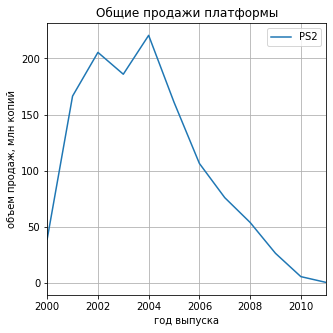

In [60]:
plot_sales_per_platform(games, 'PS2')

Платформа PS2 появилась в 2000 г. Ее популярность росла до 2004 г., после чего продажи пошли вниз и достигли нулевого значения в 2011 г.

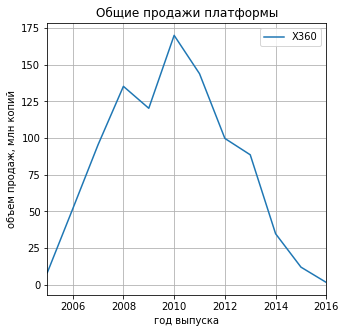

In [61]:
plot_sales_per_platform(games, 'X360')

Платформа X360 вышла на рынок в 2005 г. Объемы продаж достигли максимума в 2010 г. и упали до нуля к 2016 г.

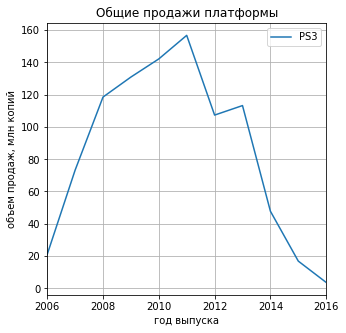

In [62]:
plot_sales_per_platform(games, 'PS3')

Первые игры на консоли PS3 появились в 2006 г. Пик продаж пришелся на 2001 г. В 2016 г. платформа практически перестала продаваться.

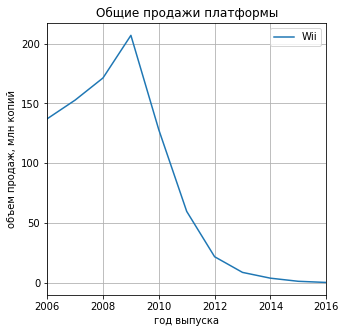

In [63]:
plot_sales_per_platform(games, 'Wii')

Платформа Wii оказалась на рынке в 2005 г. Объемы продаж достигли пика в 2009 г. и исчезли к 2016 г.

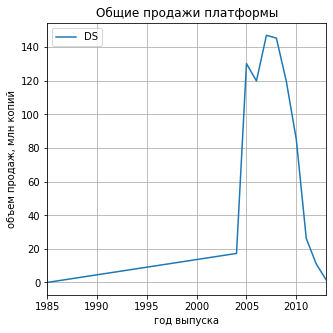

In [64]:
plot_sales_per_platform(games, 'DS')

Консоль DS - долгожитель по сравнению с осталными. Первые игры появились в 1985 г. Объем продаж плавно рос до 2004 г., затем резко увеличился и достиг максимума к 2007-2008 гг, после чего также резко снижался вплоть до 2015 г.

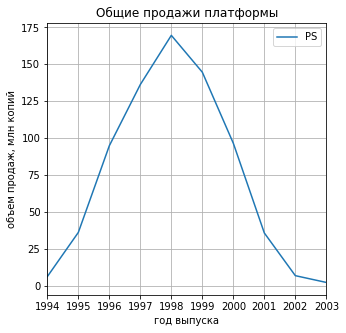

In [65]:
plot_sales_per_platform(games, 'PS')

Платформа PS появилась в 1994 г. Ее популярность увеличивалась до 1998 г., затем продажи стали падать и достигли нулевого значения в 2003 г.

Таким образом, для самых популярных платформ характерен срок жизни 10-11 лет. Единственное исключение - консоль DS (хотя [Википедия утверждает](https://ru.wikipedia.org/wiki/Nintendo_DS), что она появилась в 2004 г.: вероятно, в датасете объединены данные по играм для Nintendo Entertainment System (вышла в 1985 г.) и непосредственно DS; тогда предположение о 10 годах верно и для DS). Примерно на 4-5 год объемы продаж достигают максимального значения, а затем равномерно снижаются.

#### 3. Выбор актуального периода для прогнозирования <a name="period"></a>

Основной критерий выбора актуального периода прогнозирования - возможность построить успешный прогноз на 2017 г. в рамках проведенного анализа получены следующие выводы:

1. До 1993 года количество выпускаемых игр было крайне мало, с 1993 по 2000 началось постепенное увеличение показателя. До 2008 г. рост был очень резким, число игр в год достигло максимального значения. Начиная с 2010 г. последовало довольно серьезное падение к объемам 2001-2002 гг.
2. Для популярных платформ характерен срок жизни 10-11 лет, при этом максимальные объемы продаж приходятся примерно на 3-7 годы после их выхода на рынок.

Основной объем имеющихся данных по играм приходится на 2000-2016 гг, при этом не имеет особого смысла выбирать для прогноза промежуток более 10-11 лет, поскольку за это время успевают полностью обновиться платформы. Выберем за начало отсчета 2012 год, когда затормозился спад рынка игровых платформ и он пришел в состояние, близкое к 2016 г. Это также позволит сконцентрироваться только на самых актуальных консолях. Более старые данные не будем учитывать в дальнейшем исследовании.

In [66]:
games_final = games.query('2012 <= year_of_release')

In [67]:
games_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null int64
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             1611 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


In [68]:
games_final.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Новый датафрейм состоит из 2886 строк. В столбцах **critic_score**, **user_score** и **rating** остались пропуски, которые целенаправленно не заменялись средними значениями.

#### 4. Анализ прибыльности платформ <a name="best_platforms"></a>

Рассмотрим, какие из платформ лидируют по продажам, растут и падают.

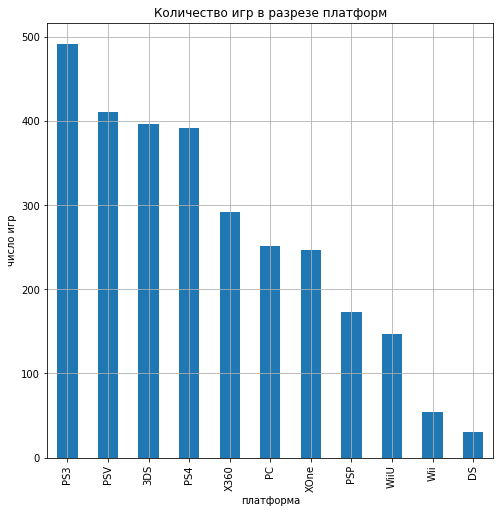

In [69]:
games_final.pivot_table(index = 'platform', values = 'name', aggfunc = 'count')\
                            .reset_index().sort_values(by = 'name', ascending = False)\
                            .plot(x = 'platform', y = 'name', grid = True, figsize = (8,8),\
                             title = 'Количество игр в разрезе платформ', kind = 'bar', legend = False)
plt.xlabel('платформа')
plt.ylabel('число игр')
plt.show()

В срезе число платформ сократилось почти втрое - с 31 до 11.

In [70]:
pivot_sales_per_platform = games_final.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
                            .reset_index().sort_values(by = 'total_sales', ascending = False)

In [71]:
pivot_sales_per_platform.head()

,platform,total_sales
4,PS4,314.14
3,PS3,288.78
9,X360,236.54
0,3DS,194.61
10,XOne,159.32


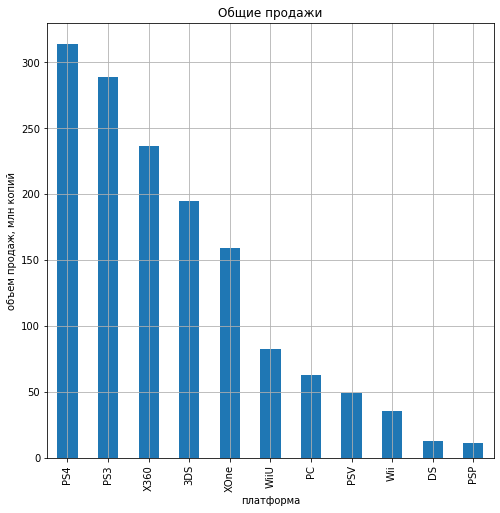

In [72]:
pivot_sales_per_platform.plot(x = 'platform', y = 'total_sales', grid = True, figsize = (8,8),\
                         title = 'Общие продажи', kind = 'bar', legend = False)
plt.xlabel('платформа')
plt.ylabel('объем продаж, млн копий')
plt.show()

Лидеры по продажам в 2012-2016 гг. - PS4 (314,14), PS3 (288,78) и X360 (226,54).

Отобрать растущие и падающие платформы проще всего визуально. Построим графики для каждой из них.

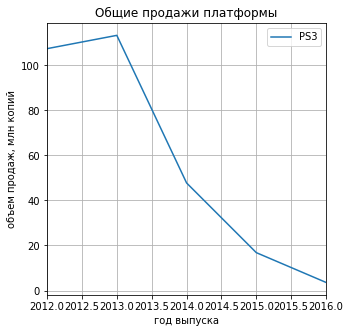

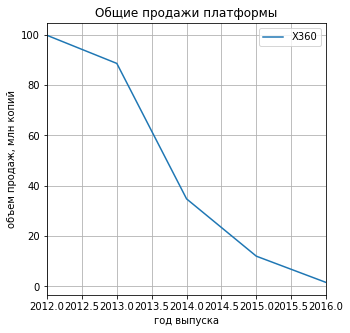

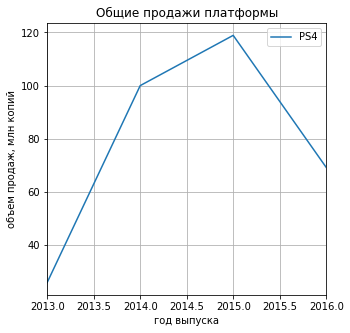

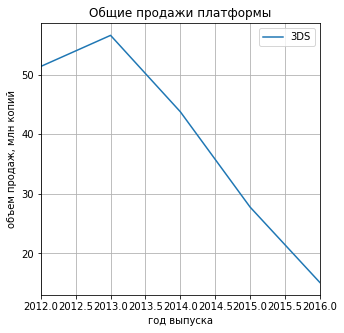

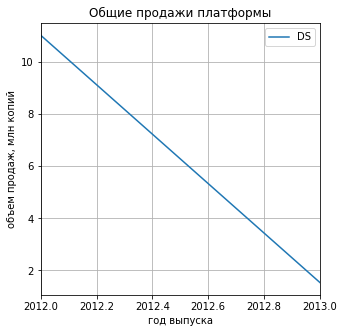

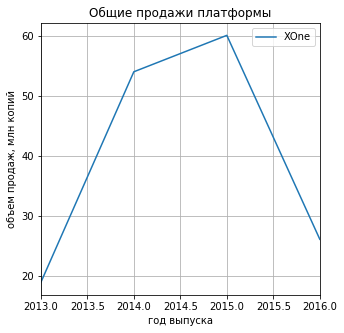

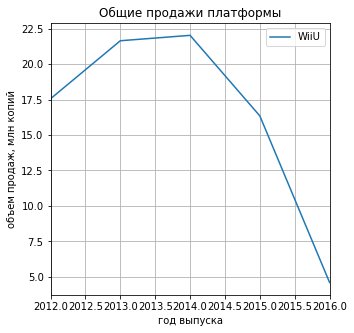

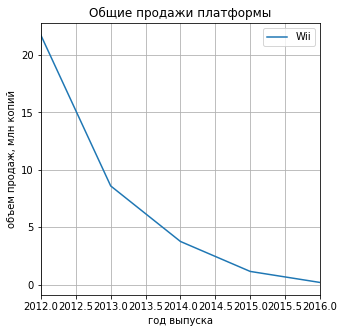

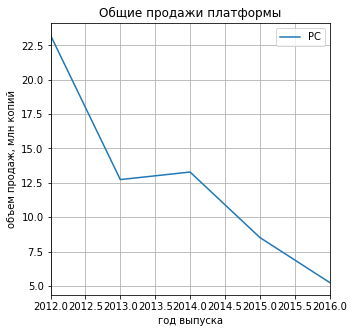

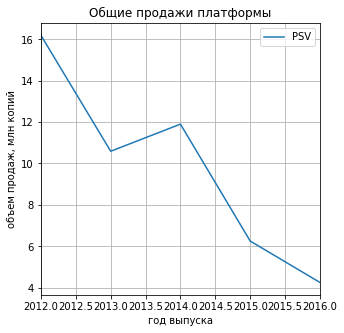

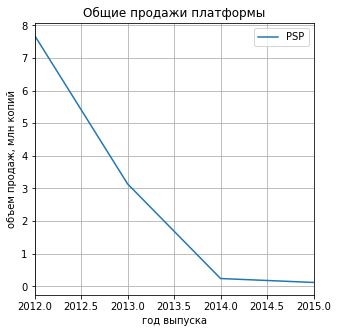

In [73]:
for pl in games_final['platform'].unique():
    plot_sales_per_platform(games_final, pl)

Сразу можно отбросить платформы, которые уже ушли с рынка (правая граница меньше 2016 г.): DS, PSP.

Среди оставшихся свою актуальность потеряли консоли PS3, X360, Wii. Их продажи ожидаемо упали практически в ноль, и нет причин рассчитывать на возобновление роста.

На всех графиках прослеживается тенденция падения продаж, что связано с общим упадком рынка консолей: в нашу жизнь все глубже проникают социальные сети, развивается рынок мобильных устройств,  снижается интерес к платформенныи играм.

Из платформ, которые, возможно, еще продержатся на рынке какое-то время, остаются следующие:
- PS4: на рынке с 2013 года; пик продаж наблюдался в 2015 г. В 2016 г. произошло падение до значений 2013 г., однако по рынку в целом был сильный провал в 2016 по сравнению с 2015 г., поэтому можно надеяться, что консоль себя не полностью исчерпала, а продажи какое-то время будут держаться на приемлемом уровне. В абсолютном выражении на 2016 г. эта платформа лидирует (70 млн копий).
- 3DS: объем продаж снижается с 2013 г. и теперь почти на нуле, шансов на положительную динамику нет.
- XOne: в 2013 г. платформа появилась на рынке, объем продаж рос до 2015 г. (макс. 60 млн копий), в 2016 упал до 27 млн. В целом объемы ниже по сравнению с PS4, но, учитывая общий упадок рынка, эта консоль выглядит немного лучше остальных.
- WiiU: объемы продаж практически на нуле, пик пройден в 2013-2014 гг. Не стоит рассматривать ее как потенциально прибыльную.
- PSV: аналогично, продажи минимальны, пик пройден в 2012 г. Платформа не будет способна генерировать прибыль;
- PC: игры для персональных компьютеров продаются уже многие десятилетия. Несмотря на общую негативную тенденцию, маловероятно, что они полностью исчезнут с рынка. 

Таким образом, ни одна платформа не показывает рост объема проданных копий. Среди оставшихся на рынке относительно доходными могут быть PS4 и XOne, а также небольшой, но надежный сектор игр для персональных компьютеров. Вероятно, следует обратить внимание на новые консоли, которые только готовятся к выходу на рынок, поскольку для действующих тенденции довольно пессимистичны.

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам:

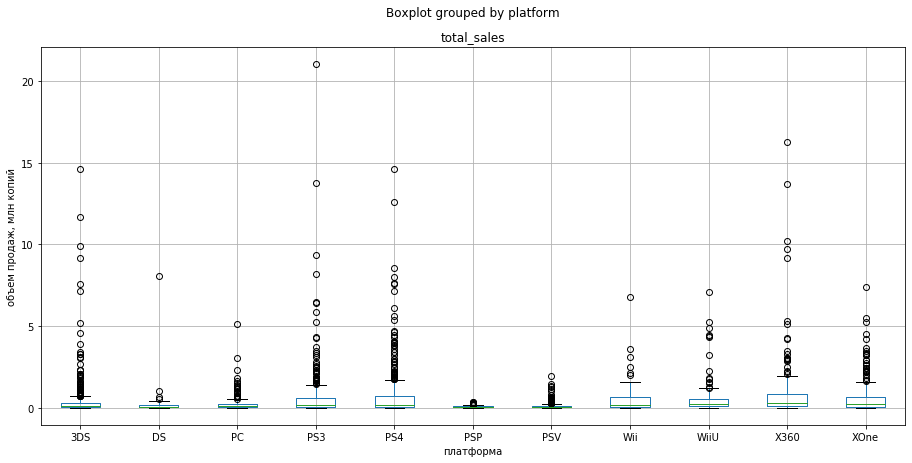

In [74]:
games_final.boxplot(column = 'total_sales', by='platform', figsize = (15, 7))
plt.xlabel('платформа')
plt.ylabel('объем продаж, млн копий')
plt.show()

Запомним, что у распределений платформ 3DS, PS3, PS4 и X360 были выбросы большого значения, и построим график в других масштабах:

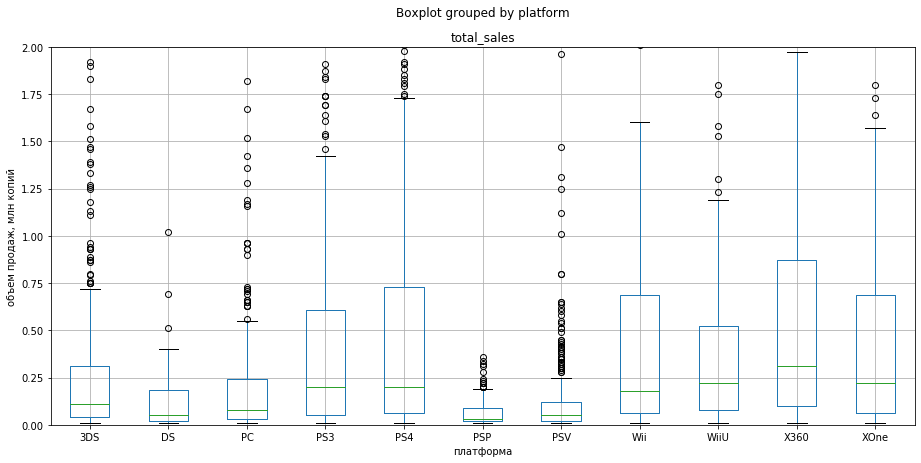

In [75]:
games_final.boxplot(column = 'total_sales', by='platform', figsize = (15, 7), )
plt.xlabel('платформа')
plt.ylabel('объем продаж, млн копий')
plt.ylim(0, 2)
plt.show()

Медианное значение объема проданных игр практически для всех платформ колеблется в одном диапазоне - от 0,1 до 0,25 млн копий. Лидирует консоль X360, единственная превысившая этот показатель.

Межквартильный размах для половины платформ более узкий и принимает более низкие значения (примерно от 0,02 до 0,3 млн). Для другой половины (PS3, PS4, Wii, WiiU, X360, XOne) он существенно длиннее и находится в диапазоне от 0,1 до 0,85 млн.

Количество выбросов различается от платформы к платформе. В целом можно казать, что самые низкие экстремальные значения имеют место для консолей DS, PC, PSP, PSV. Максимальные - для 3DS, PS3, PS4, X360.

#### 5. Взаимосвязь отзывов и объема продаж <a name="sales_review"></a>

Рассмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков. В качестве примера платформу PS4 как самую перспективную из всех рассматриваемых в периоде прогнозирования, построим матрицу рассеяния и посчитаем коэффициент корреляции:

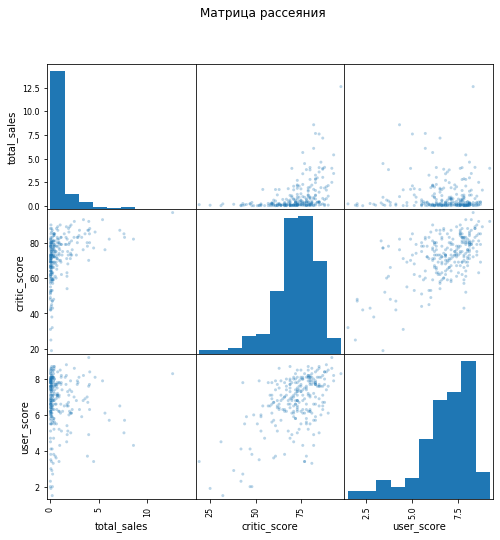

In [76]:
pd.plotting.scatter_matrix(games_final.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']],\
                           alpha = 0.3, figsize = (8, 8))
plt.suptitle('Матрица рассеяния')
plt.show()

In [77]:
games_final.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Матрица рассеяния позволяет сделать следующее заключение: сильной корреляции между объемом продаж и оценками критиков или пользователей не наблюдается. Оба графика близки к горизонтальной линии. В случае зависимости продаж от рейтинга критиков связь сильнее (коэффициент корреляции 0,41) и наблюдается в основном в правой части графика: при достаточно высоких оценках критиков (примерно от 75 баллов) вместе с их дальнейшим ростом увеличивается и объем продаж. Коэффициент корреляции между продажами и рейтингом пользователей незначителен (-0,03), эту связь не стоит принимать во внимание.
При этом оценки критиков и пользователей имеют существенную положительную корреляцию (0,56), что отражено и на графике.

Похожие результаты можно получить и по всей совокупности платформ:

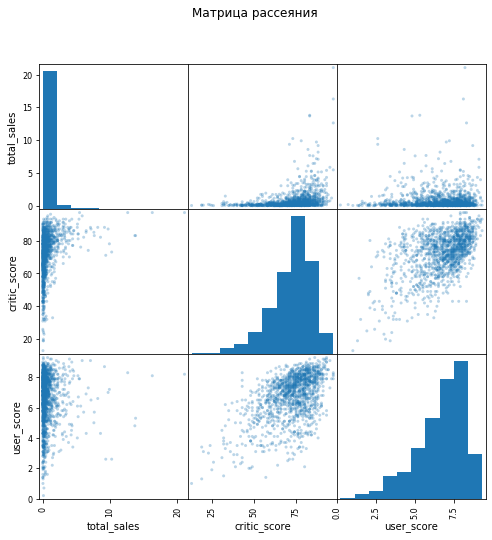

In [78]:
pd.plotting.scatter_matrix(games_final[['total_sales', 'critic_score', 'user_score']],\
                           alpha = 0.3, figsize = (8, 8))
plt.suptitle('Матрица рассеяния')
plt.show()

Таким образом, объемы продаж в целом не имеют связи с рейтингами пользователей и имеют несильную положительную связь с оценками критиков. Этот феномен можно объяснить сильной субъективизацией оценок, в большей степени от обычных игроков и в меньшей - от экспертов. Оценки слишком сильно зависит от вкуса и личных предпочтений рецензента, чтобы на их основании принимать решение о покупке игры.  

#### 6. Взаимосвязь игровых жанров и объема продаж <a name="sales_genre"></a>

Рассмотрим общее распределение игр по жанрам.

In [79]:
pivot_sales_per_genre = games_final.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'count')\
                            .reset_index().sort_values(by = 'total_sales', ascending = False)

In [80]:
pivot_sales_per_genre.head()

,genre,total_sales
0,Action,1032
7,Role-Playing,370
1,Adventure,302
10,Sports,267
8,Shooter,235


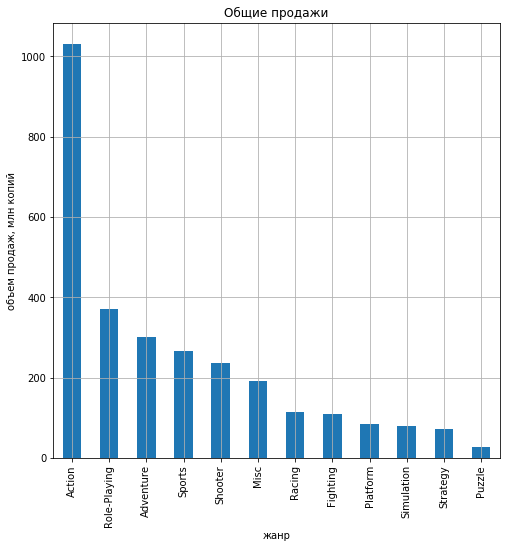

In [81]:
pivot_sales_per_genre.plot(x = 'genre', y = 'total_sales', grid = True, figsize = (8,8),\
                         title = 'Общие продажи', kind = 'bar', legend = False)
plt.xlabel('жанр')
plt.ylabel('объем продаж, млн копий')
plt.show()

Среди всех жанров выделяется экшн. Объемы продаж игр этого жанра (более 1000 млн копий) практически втрое превышают объемы средних по популярности - ролевых, квестов, спортивных, шутеров квестов, а также игр смешанного жанра (от 200 до 400 млн копий). Среди аутсайдеров (100 копий и менее) - гонки, файтинг, платформеры, симуляторы, стратегии и головоломки. 

**Вывод**

До 1993 года количество выпускаемых игр было крайне мало, В 1993 началось постепенное увеличение показателя, которое перешло в бурный рост в 2000 г. Начиная с 2010 г. последовало существенное падение к объемам 2001-2002 гг. За начало отсчета взят 2012 год, когда затормозился спад рынка игровых платформ и он пришел в состояние, близкое к 2016 г. Выбранный период также позволяетт сконцентрироваться только на самых актуальных консолях. 

Ни одна платформа в указанном периоде не показывает рост объема проданных копий. Среди оставшихся на рынке принести прибыль могут лишь PS4 и XOne, а также долгое время занимающие свою нишу игры для PC. Заказчику следует обратить внимание на новые консоли, которые только готовятся к выходу на рынок.

Выявлено, что объемы продаж в целом не зависят от рейтингов пользователей и имеют несильную положительную связь с оценками критиков. Это можно объяснить сильной субъективизацией оценок (в большей степени от обычных игроков и в меньшей - от экспертов), которые сильно зависит от вкуса и личных предпочтений рецензента, чтобы на их основании принимать решение о покупке игры.  

По популярности среди жанров лидирует экшн. Объемы продаж игр таких игр (более 1000 млн копий) практически втрое превышают объемы средних по популярности - ролевых, квестов, спортивных, шутеров квестов, а также игр смешанного жанра (от 200 до 400 млн копий). Хуже всего продаются - 100 копий и менее - гонки, файтинг, платформеры, симуляторы, стратегии и головоломки. 

### Шаг 4. Анализ пользователей из разных регионов <a name="regions"></a>

Определим для пользователя каждого региона (Северная Америка, Европа, Япония):
 - топ-5 платформ;
 - топ-5 жанров;
 - влияние рейтинга ESRB на продажи.

Напишем функцию **describe_reg**, которая принимает на вход объем продаж в определенном регионе и выводит топ-5 платформ, топ-5 жанров и график продаж в зависимости от рейтинга:

In [82]:
def pivot_sales(ind, val):
    return games_final\
                    .pivot_table(index = ind, values = val, aggfunc = 'sum')\
                    .reset_index().sort_values(by = val, ascending = False)

def describe_reg(reg_sales):
    print('Общее число проданных игр в 2012-2016 гг, млн копий:', games_final[reg_sales].sum().round(2))
    print()

    
    print('Топ-5 платформ')
    display(pivot_sales('platform', reg_sales).head())
    print()
    
    print('Топ-5 жанров')
    display(pivot_sales('genre', reg_sales).head())
    print()
    
    print('Влияние рейтинга ESRB')
    pivot_sales('rating', reg_sales).plot(x = 'rating', y = reg_sales, grid = True, figsize = (8,8),\
                         title = 'Региональные продажи', kind = 'bar', legend = False)
    plt.xlabel('рейтинг')
    plt.ylabel('объем продаж, млн копий')
    plt.show()

**1. Профиль пользователя из Северной Америки** 

Общее число проданных игр в 2012-2016 гг, млн копий: 591.03

Топ-5 платформ


,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31



Топ-5 жанров


,genre,na_sales
0,Action,177.90
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19



Влияние рейтинга ESRB


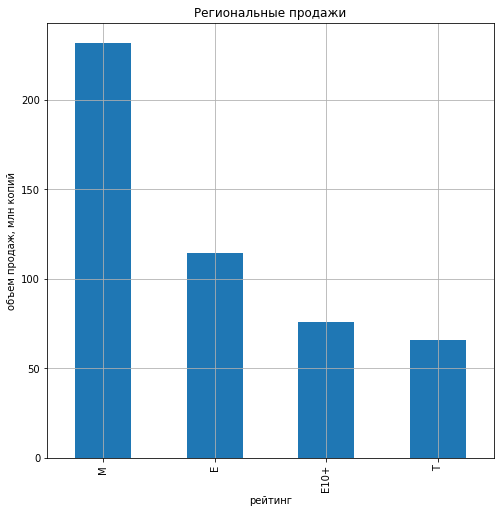

In [83]:
describe_reg('na_sales')

Самые популярные платформы в Северной Америке (в порядке убывания) - X360, PS4, PS3, XOne, 3DS.

Самые популярные жанры (в порядке убывания) - экшн, шутеры, спортивные игры, ролевые игры, игры в смешанном жанре.

Самые большие продажи пришлись на игры с рейтингом (в порядке убывания) М ("для взрослых"), Е ("для всех"), Е10+ ("для всех от 10 лет"), Т ("для подростков"). Продаж игр с другим рейтингом не было.

**2. Профиль пользователя из Европы** 

Общее число проданных игр в 2012-2016 гг, млн копий: 507.06

Топ-5 платформ


,platform,eu_sales
4,PS4,141.09
3,PS3,106.85
9,X360,74.52
10,XOne,51.59
0,3DS,42.64



Топ-5 жанров


,genre,eu_sales
0,Action,159.59
8,Shooter,113.47
10,Sports,69.08
7,Role-Playing,48.53
6,Racing,27.29



Влияние рейтинга ESRB


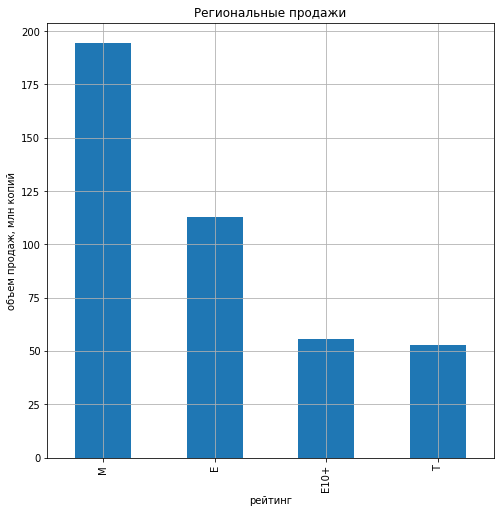

In [84]:
describe_reg('eu_sales')

Самые популярные платформы в Европе (в порядке убывания) - PS4, PS3, X360, XOne, 3DS.

Самые популярные жанры (в порядке убывания) - экшн, шутеры, спортивные игры, ролевые игры, гонки.

Самые большие продажи пришлись на игры с рейтингом (в порядке убывания) М ("для взрослых"), Е ("для всех"), Е10+ ("для всех от 10 лет"), Т ("для подростков"). 

**3. Профиль пользователя из Японии** 

Общее число проданных игр в 2012-2016 гг, млн копий: 192.58

Топ-5 платформ


,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01



Топ-5 жанров


,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44



Влияние рейтинга ESRB


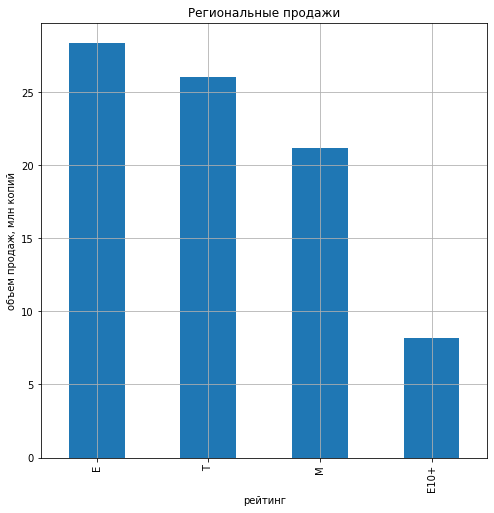

In [85]:
describe_reg('jp_sales')

Самые популярные платформы в Японии (в порядке убывания) - 3DS, PS3, PSV, PS4, WiiU.

Самые популярные жанры (в порядке убывания) - ролевые, экшн, игры в смешанном жанре, симуляторы, файтинг.

Самые большие продажи пришлись на игры с рейтингом (в порядке убывания) Е ("для всех"), Т ("для подростков"), М ("для взрослых") и Е10+ ("для всех от 10 лет"). 

**Вывод**

Несмотря на то, что численность населения в Японии самая низкая (около 125 млн человек) среди представленных регионов (580 млн в Северной Америке, 740 млн в Европе), количество приобретенных игр за рассматриваемый период на одного человека там максмиально - 1,53 шт. В Северной Америке этот показатель равен 1,01 шт., а в Европе существенно ниже - всего 0,68 шт.

При выборе платформы американцы и европейцы в целом демонстрируют похожие вкусы: самые популярные консоли - X360, PS4, PS3, XOne, 3DS. На этих рынках в основном популярны консоли от Microsoft и Sony. Сами же японцы предпочитают отечественные платформы - в топе исключительно продукция от Nintendo и Sony. 

Жанровые предпочтения в Европе и Северной Америке также близки (топ-4 состоит из одних и тех же жанров). Среди любимых - экшн (лидирует с существенным отрывом), шутеры, спортивные игры, ролевые игры. Эту особенность можно объяснить похожим менталитетом жителей: основную часть геймеров составляют в Северной Америке жители США, у которых много общего с европейцами. Японцы же отдают предпочтение жанру ролевых игр, большинство из которых разрабатывалось именно в Японии для внутреннего рынка.  

Наконец, распределение объема продаж в зависимости от рейтинга ESRB выглядит абсолютно одинаково для рынков Европы и Северной Америки (с поправкой на общее количество продаж). Наиболее популярны там игры с рейтингом "для взрослых", менее всего - игры для подростков. Для Японии же характерна большая доля игр, предназначенных для любого возраста либо для подростков. Они в целом популярнее, чем игры для взрослых и игры для всех от 10 лет.

### Шаг 5. Проверка гипотез <a name="hypothesis"></a>

Проверим следующие гипотезы:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные. 

Для удобства дальнейшей работы определим функцию **statistics**, которая будет возвращать переменную, распределение которой нас интересует, а также выводить на экран статистики этого распределения и гистограмму. В функцию передается три параметра: *par* - столбец, по которому задается условие, *val* - значение параметра, *col* - исследуемая переменная. 

In [86]:
def statistics(par, val, col):
    s = games_final.loc[games_final[par] == val][col]
    print('Статистики распределения:')
    print(s.describe())
    print('дисперсия:', np.var(s, ddof = 1).round(2))
    print('стандартное отклонение:', np.std(s, ddof = 1).round(2))
    print()
        
    s.hist(bins = 20, figsize=(8, 8))
    plt.suptitle(val)
    plt.xlabel(col)
    plt.show()
    
    return s

#### 1. Средние пользовательские рейтинги платформ Xbox One и PC <a name="xbox_pc"></a>

**Нулевая гипотеза**: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковы".

**Альтернативная гипотеза**: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

В соответствии с формулировкой альтернативной гипотезы будем применять **двусторонний критерий**. 

Рассмотрим распределение пользовательского рейтинга для игр платформы XOne:

Статистики распределения:
count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
дисперсия: 1.91
стандартное отклонение: 1.38



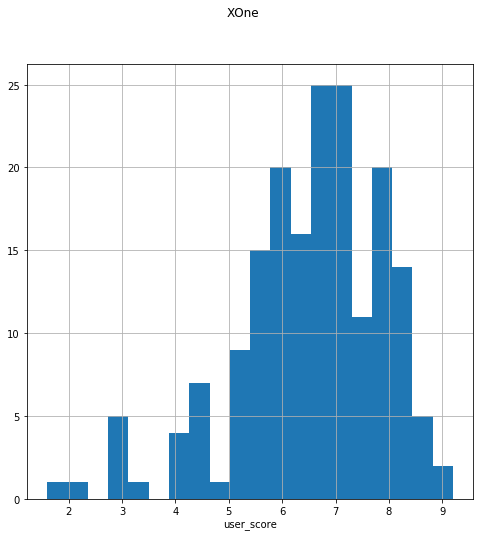

In [87]:
xbox_one = statistics('platform', 'XOne', 'user_score')

Для платформы XOne имеется 182 пользовательских оценки об играх. Распределение визаульно похоже на нормальное, скошенное влево. Среднее значение рейтинга составляет 6,52, медианное - 6,8. Дисперсия 1,91, стандартное отклонение - 1,38. Размах выборки - 7,6 (минимум - 1,6, максимум - 9,2).

Статистики распределения:
count    207.000000
mean       6.438647
std        1.666650
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64
дисперсия: 2.78
стандартное отклонение: 1.67



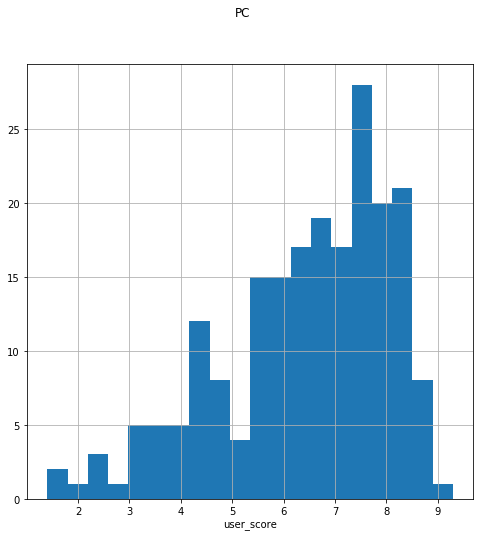

In [88]:
pc = statistics('platform', 'PC', 'user_score')

Для платформы PC известно 207 пользовательских оценок. Распределение похоже на нормальное, но сильно скошенное влево. Среднее значение рейтинга составляет 6,44, медианное - 6,8. Дисперсия 2,78, стандартное отклонение - 1,67. Размах выборки - 7,9 (минимум - 1,4, максимум - 9,3).

Поскольку объемы выборок достаточно большие, в качестве критического уровеня статистической значимости возьмем значение **0.01**.

Перед проверкой гипотезы необходимо оценить равенство дисперсий выборок. Воспользуемся тестом Левена (поскольку распределения скошены, выберем параметр *median*):

In [89]:
result_levene = st.levene(xbox_one.dropna(), pc.dropna(), center = 'median')

In [90]:
print('p-значение:', result_levene.pvalue.round(5))

p-значение: 0.01172


p-значение теста Левена превышает выбранный уровень значимости, поэтому не будем отвергать нулевую гипотезу о равенстве дисперсий выборок для рейтинга по платформам XOne и PC. Укажем параметр, отвечающий за равенство дисперсий в статистическом тесте, как True.

In [91]:
result_platforms = st.ttest_ind(xbox_one.dropna(), pc.dropna(), equal_var = True)

In [92]:
print('p-значение:', result_platforms.pvalue.round(5))

p-значение: 0.59702


Полученный уровень значимости существенно выше выбранного критического уровня, поэтому нет оснований отвергнуть нулевую гипотезу о равенстве cредних пользовательских рейтингов платформ Xbox One и PC.

#### 2. Средние пользовательские рейтинги жанров Action и Sports <a name="action_sports"></a>

**Нулевая гипотеза**: "Средние пользовательские рейтинги жанра экшн и жанра спортивных игр одинаковы".

**Альтернативная гипотеза**: "Средние пользовательские рейтинги жанра экшн и жанра спортивных игр различаются".

В соответствии с формулировкой альтернативной гипотезы будем применять **двусторонний критерий**. 

Рассмотрим распредедения.

Статистики распределения:
count    524.000000
mean       6.828244
std        1.375073
min        1.600000
25%        6.275000
50%        7.150000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
дисперсия: 1.89
стандартное отклонение: 1.38



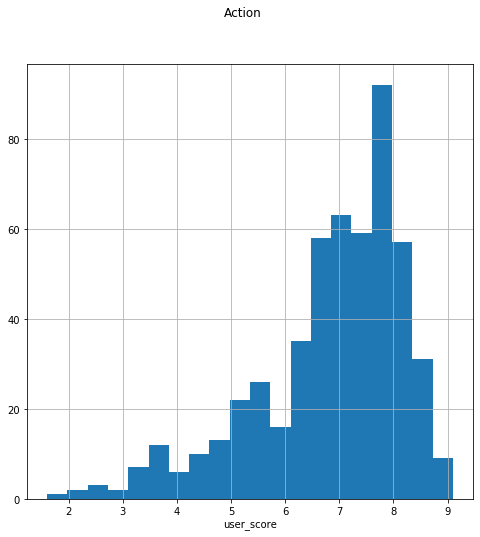

In [93]:
action = statistics('genre', 'Action', 'user_score')

Для жанра экшн получено 524 пользовательских оценки. Распределение выглядит как нормальное, скошенное влево. Среднее значение рейтинга составляет 6,83, медианное - 7,15. Дисперсия 1,89, стандартное отклонение - 1,38. Размах выборки - 7,5 (минимум - 1,6, максимум - 9,1).

Статистики распределения:
count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64
дисперсия: 3.04
стандартное отклонение: 1.74



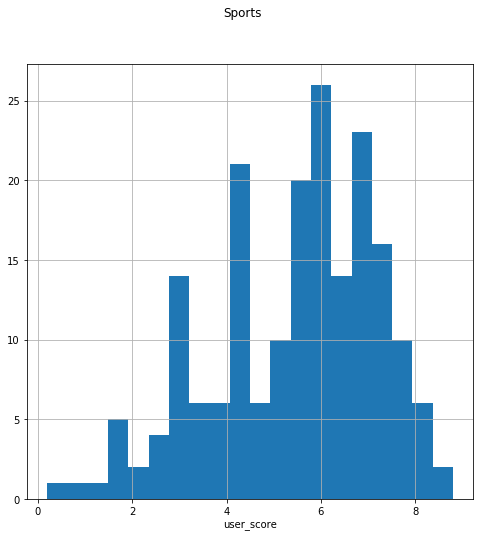

In [94]:
sports = statistics('genre', 'Sports', 'user_score')

Для жанра спортивных игр имеется 194 пользовательских оценки. Распределение отчасти похоже на нормальное, скошенное влево. Среднее значение рейтинга составляет 5,45, медианное - 5,75. Дисперсия 3,04, стандартное отклонение - 1,74. Размах выборки - 8,6 (минимум - 0,2, максимум - 8,8).

В качестве критического уровеня статистической значимости снова возьмем значение **0.01**

Для оценки равенства дисперсий проведем тест Левена:

In [95]:
result_levene = st.levene(action.dropna(), sports.dropna(), center = 'median')

In [96]:
print('p-значение:', result_levene.pvalue.round(5))

p-значение: 1e-05


p-значение теста Левена меньше критического уровеня значимости, поэтому есть основания отвергнуть нулевую гипотезу о равенстве дисперсий выборок для рейтинга по рассматриваемым жанрам.

In [97]:
result_genre = st.ttest_ind(action.dropna(), sports.dropna(), equal_var = False)

In [98]:
print('p-значение:', result_genre.pvalue.round(5))

p-значение: 0.0


Полученный уровень значимости ниже выбранного критического уровня, поэтому есть основания отвергнуть нулевую гипотезу о равенстве cредних пользовательских рейтингов для жанра экшн и жанра спортивных игр.

**Вывод**

Статистические тесты приводят нас к следующим заключениям:

- средний пользовательский рейтинг игр и на платформе XOne составляет 6,52, на PC - 6,44;
- результаты статистического теста не значимы на 1%-м уровне; полученное р-значение не позволяет отвергнуть нулевую гипотезу о равенстве средних рейтингов;


- средний пользовательский рейтинг игр жанра экшн составляет 6,83, жанра спортивных игр - 5,45;
- различия между выборками пользовательских рейтингов для жанра экшн и жанра спортивных игр обнаружены на высоком уровне статистической значимости, поэтому есть основания отвергнуть нулевую гипотезу о равенстве средних рейтингов.

### Шаг 6. Общий вывод <a name="conclusion"></a>

В работе проведен анализ факторов, влияющих на объем продаж компьютерных игр. Исходный датафрейм содержит данные за 1980-2016 гг, при этом основной объем имеющейся информации приходится на 2000-2016 гг. За начало отсчета выбран 2012 год, когда когда затормозился спад рынка игровых платформ и он пришел в состояние, близкое к 2016 г. Выбранный период также позволяетт сконцентрироваться только на самых актуальных консолях, характерный срок жизни которых не превышает 11 лет. 

Исследование позволяет сделать следующие выводы.

Ни одна платформа в указанном периоде не показывает рост объема проданных копий. Среди оставшихся на рынке относительно высокие продажи показывают PS4 и XOne. Сравнительно надежным остается также рынок игр для PC, поскольку для него нет ограниченного жизненного цикла. Заказчику следует обратить внимание на новые консоли, которые только готовятся к выходу на рынок.

Объемы продаж в целом не зависят от рейтингов пользователей и имеют несильную положительную связь с оценками критиков, что, вероятно, объясняется субъективизацией оценок (в большей степени от обычных игроков и в меньшей - от экспертов), на которые влияют вкусы и личные предпочтения рецензента. Таким образом, заказчику нет смысла тратить дополнительные ресурсы на сбор информации о рейтингах игр.

Среди жанров потенциально наиболее прибыльным представляется экшн. Объемы продаж таких игр (более 1000 млн копий) практически втроее превышают объемы следующих по распространенности - ролевых, квестов, спортивных, шутеров квестов, а также игр смешанного жанра (от 200 до 400 млн копий). Интернет-магазину стоит обратить внимание и на эти игры. Хуже всего продаются гонки, файтинг, платформеры, симуляторы, стратегии и головоломки.

Потребители в разных регионах мира имеют разные вкусы, и рекламная кампания должна это учитывать:
- в Европе и Америке больше популярны игры на консолях, выпускаемых Microsoft и Sony. В Японии, предпочитают отечественные Nintendo, а также Sony.
- любимый жанр американцев и европейцев - экшн; в числе фаворитов также шутеры, спортивные игры и ролевые игры. Японцы отдают существенное предпочтение жанру ролевых игр, однако популярностью пользуются также экшн, игры в смешанном жанре, симуляторы и файтинг. 
- распределение объема продаж в зависимости от рейтинга ESRB выглядит одинаково для рынков Европы и Северной Америки (в порядке убывания объема продаж): М ("для взрослых"), Е ("для всех"), Е10+ ("для всех от 10 лет") и Т ("для подростков"). В Японии игры для детей и подростков значительно более популярны. 

Наконец, отметим, что хотя численность населения в Японии самая низкая, среди представленных регионов количество приобретенных игр за рассматриваемый период на одного человека там максмиально - 1,53 шт. В Северной Америке этот показатель равен 1,01 шт., а в Европе 0,68 шт. Именно в Японии (и в меньшей степени в Северной Америке) интерес к играм в целом выше, и есть больше шансов превратить покупателей в постоянных клиентов.

Таким образом, заказчику можно посоветовать: 

- в целом обратить внимание на готовящиеся к запуску новые консоли, так как старые практически исчерпали себя. Из действующих сосредоточиться на PS4;
- провести отдельную рекламную кампанию для японского рынка, поскольку этот регион обладает своей спецификой. Особой популярностью пользовались бы ролевые игры, основная аудитория которых попадает под рейтинг E (как взрослые, так и дети от 6 лет) или T (подростки). Следует учесть, что японцы предпочитают консоли отечественного производства;
- не тратить бюджет на проведение разных рекламных кампаний в Европе и Северной Америке, поскольку менталитет и вкусы потребителей указанных регионов схожи. Предпочтительнее выбрать консоль не японского производства, жанр - экшн, рейтинг - "для взрослых";
- в связи с общим упадком в игровой индустрии на рынке платформ обратить внимание на другие ниши, которые потенциально могли бы стать более прибыльными.
